## Nome: Felipe Ferreira de Carvalho Gabriel Pereira
## Matricula: 380

---

## **Atividade 4** – Zeros de Funções: Refinamento de Raízes Reais pelo Método de Newton–Raphson

**Objetivo:** neste notebook, você irá **aplicar o método de Newton–Raphson** e **refinar raízes reais** em problemas contextualizados.  
Você encontrará **códigos-base, imports e células-guia** para implementar o método, analisar convergência e responder às questões propostas.

Material de apoio:
* https://youtu.be/gpaXPYKDWJg?si=1yG79BmrI7GQgzXY
* https://flexiple.com/python/newton-raphson-method-python

> Importante: execute as células na ordem. Se precisar, reinicie o kernel e rode tudo novamente.



---
# Método de Newton–Raphson

O **Método de Newton–Raphson** é um método iterativo usado para encontrar raízes de equações reais, isto é, soluções para $f(x)=0$, onde $f(x)$ é uma função derivável. Ele constrói uma sequência de aproximações da raiz utilizando a derivada da função a cada iteração.

## Como funciona

1. **Chute inicial:**
   Começa-se com um valor inicial $x_0$ próximo à raiz desejada.

2. **Tangente:**
   Traça-se a reta tangente ao gráfico de $f(x)$ no ponto $(x_0, f(x_0))$.

3. **Próxima aproximação:**
   A próxima aproximação $x_1$ é o ponto onde essa tangente intercepta o eixo $x$.

4. **Iteração:**
   Repete-se o processo (passos 2 e 3) com a nova aproximação $x_1$ até que a diferença entre duas iterações sucessivas seja menor que uma tolerância (erro máximo) especificada.

## Fórmula

A fórmula principal do método é:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

**Onde:**

* $x_{n+1}$ é a próxima aproximação da raiz;
* $x_n$ é a aproximação atual;
* $f(x_n)$ é o valor da função na aproximação atual;
* $f'(x_n)$ é o valor da derivada da função na aproximação atual.


---
# Códigos auxiliares para o desenvolvimento das questões.
> **Observação:** Realize as alterações necessárias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defina a função de destino cuja raiz você deseja encontrar
def target_function(x):
    return x**3 - 5*x**2 + 2*x + 1 # <- Modifique conforme o enunciado

# Calcula a derivada da função
def derivative_function(x):
    return 3*x**2 - 10*x + 2 # <- Calcule a derivada da função e modifique

In [3]:
# implementa o processo de iteração usando a fórmula de Newton-Raphson
def newton_raphson_method(initial_guess, tolerance, max_iterations):
    """
    Aplica o método de Newton–Raphson para aproximar uma raiz de target_function(x).

    :param initial_guess: chute inicial x0
    :param tolerance: tolerância para parada (critério |f(x)| < tolerance)
    :param max_iterations: número máximo de iterações
    :return: raiz aproximada (float)
    """
    x_n = initial_guess
    for iteration in range(max_iterations):
        f_x = target_function(x_n)
        f_prime_x = derivative_function(x_n)

        if abs(f_x) < tolerance:
            break

        x_n = x_n - f_x / f_prime_x

    return x_n

In [4]:
initial_guess  = 8.0     # chute inicial
tolerance      = 1e-9    # tolerância
max_iterations = 250     # máximo de iterações

In [9]:
# Plota o gráfico da função e raiz(es)
def plot_function_and_roots(xmin, xmax, roots=None):
    """
    Plota target_function(x) no intervalo [xmin, xmax] e marca raízes (se fornecidas).
    :param xmin: limite inferior do eixo x
    :param xmax: limite superior do eixo x
    :param roots: lista de raízes para destacar (ex.: [root]) ou None
    :param titulo: título do gráfico
    """
    xs = np.linspace(xmin, xmax, 400)
    ys = [target_function(x) for x in xs]

    plt.figure(figsize=(6,4))
    plt.axhline(0, linewidth=1)        # eixo x
    plt.plot(xs, ys, linewidth=2)      # f(x)

    if roots:
        for r in roots:
            plt.scatter([r], [target_function(r)], s=60, zorder=3)
            plt.axvline(r, linestyle='--', linewidth=1)
            plt.text(r, 0, f"{r:.4g}", ha='center', va='bottom')

    plt.xlim(xmin, xmax)
    plt.xlabel("x"); plt.ylabel("f(x)")
    plt.title("Título")
    plt.grid(True, alpha=0.3)
    plt.show()

Raiz estimada: 4.507018644092977


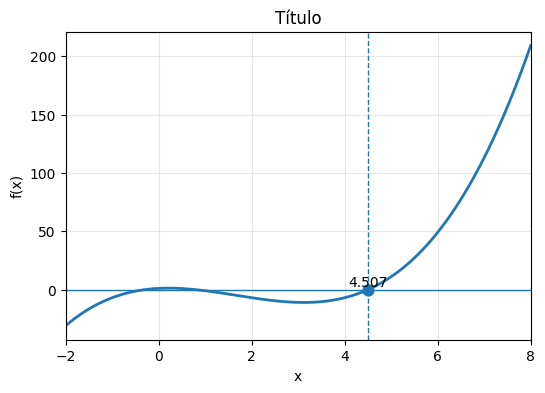

In [8]:
root = newton_raphson_method(initial_guess, tolerance, max_iterations)
print("Raiz estimada:", root)
plot_function_and_roots(-2, 8, roots=[root])

---
### Parte Prática:
> Utilizando os códigos fornecidos, faça o que se pede.

## Questão 1 — Determinar as raízes da função:

**Enunciado.** Considere a função

$$
f(x)=x^3-9x+3.
$$

Determine a **raiz** no intervalo $[0,1]$ usando o **método de Newton–Raphson** com erro máximo de $10^{-2}$.

**Dados:**

* **Tolerância:** $\varepsilon = 10^{-2}$
* **Chute inicial:** $x_0 = 0{,}5$
* **Máximo de iterações:** $N_{\max} = 50$



a) Encontre a derivada da função:

:Resposta: 3x^2 - 9

b) Valor aproximado da raiz:

In [14]:
def target_function(x):
    return x**3 - 9*x + 3

def derivative_function(x):
    return 3*x**2 - 9

def newton_raphson_method(initial_guess, tolerance, max_iterations):
    x_n = initial_guess
    ultima_iteracao = 0
    for iteration in range(max_iterations):
        f_x = target_function(x_n)
        f_prime_x = derivative_function(x_n)

        if abs(f_x) < tolerance:
            ultima_iteracao = iteration + 1
            break

        x_n = x_n - f_x / f_prime_x

    return x_n, ultima_iteracao

valor_inicial = 0.5
tolerance = 1e-2
iteracoes_maximas = 50

raiz_aproximada, ultima_iteracao = newton_raphson_method(valor_inicial, tolerance, iteracoes_maximas)
print(raiz_aproximada)

0.33760683760683763


c) Número de iterações realizadas até atingir o critério de parada:

In [15]:
print(ultima_iteracao)

3


d) Plote o gráfico da função e a raíz encontrada:





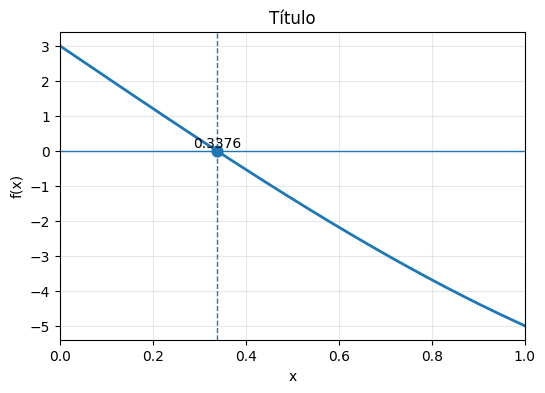

In [17]:
plot_function_and_roots(0, 1, [raiz_aproximada])

## Questão 2 — Deflexão de uma mola levemente não linear

Uma mola real apresenta leve não linearidade. A deflexão $x$ (em metros) sob uma força aplicada $F$ pode ser aproximada por:

$$
f(x) = k\,x + \alpha\,x^3 - F = 0.
$$

**Dados:**

* Rigidez linear $k = 180$ (unidades coerentes)
* Não linearidade $\alpha = 8$
* Força aplicada $F = 60$
* Intervalo de interesse: $x \in [0,\;0{,}6]$

* **Tolerância:** $\varepsilon = 10^{-2}$
* **Chute inicial:** $x_0 = 0{,}3$
* **Máximo de iterações:** $N_{\max} = 100$


a) Encontre a derivada da função:

Resposta: 180 + 24*x^2

b) Valor aproximado da raiz no intervalo:

In [23]:
def target_function(x):
    return 180*x + 8*x**3 - 60

def derivative_function(x):
    return 180 - 24*x**2

valor_inicial = 0.3
tolerancia = 1e-2
iteracoes_maximas = 100

raiz_aproximada, ultima_iteracao = newton_raphson_method(valor_inicial, tolerancia, iteracoes_maximas)

print(raiz_aproximada)

0.33168687343813325


c) Número de iterações realizadas até atingir o critério de parada:

In [24]:
print(ultima_iteracao)

3


d) Plote o gráfico da função e a raíz encontrada:

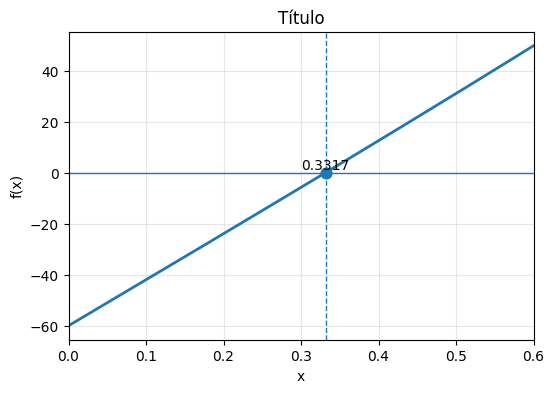

In [28]:
plot_function_and_roots(0, 0.6, [raiz_aproximada])

---
### Parte Teórica:
>**Instruções:** assinale **V** (verdadeiro) ou **F** (falso) em cada afirmativa. **Justifique se for falso**.



a) Uma desvantagem de usar $\lvert f(x_k)\rvert < \varepsilon$ como critério de parada é que a função pode apenas chegar próximo de $0$, mas não cruzar o eixo $x$.

> Adicionar aspas



Resposta: **Falso**, pois pode acontecer de x_k ser exatamente a raiz de x_k, ou seja $\lvert f(x_k)\rvert < \varepsilon$ pode ser verdadeiro se $\lvert f(x_k)\rvert = 0$, já que $\varepsilon > 0$

b) Dado um intervalo $[a,b]$, se $f$ é contínua, $f(a) > 0$ e $f(b) > 0$, então não há raiz real no intervalo $[a,b]$.

Resposta: **Verdadeiro**

c) Dado um intervalo $[a,b]$, se $f$ é contínua, $f(a) > 0$ e $f(b) < 0$, então há exatamente uma única raiz real no intervalo $[a,b]$.

Resposta: **Falso**, pois pode existir varias raises entre esses dois valores, a unica coisa que isso define é que existe pelo menos uma raiz nesse intervalo

d) O método de Newton terá uma melhor convergência se já estiver próximo da raiz.

 Resposta: **Verdadeiro**